In [1]:
import numpy as np

import matplotlib.pyplot as plt
from functools import partial
from scipy import integrate

from IPython.display import HTML, display
import tabulate

%matplotlib inline

In [2]:
def lsm_coefs(basis_functions, x, y):
    n = len(x)
    m = len(basis_functions)
    phi = np.zeros((n, m))
    for i in range(n):
        phi[i, :] = x[i]
    for j in range(m):
        phi[:, j] = basis_functions[j](phi[:, j])

    lmbd = phi.T @ phi
    beta = phi.T @ y.reshape(-1, 1)

    a = np.linalg.solve(lmbd, beta)
    return a.reshape(-1)

In [3]:
def lsm_coefs_integral(basis_functions, x, y):
    m = len(basis_functions)
    lmbd = np.zeros((m, m))
    beta = np.zeros((m, 1))
    for i in range(m):
        yi = basis_functions[i](x)
        for j in range(m):
            yj = basis_functions[j](x)
            lmbd[i, j] = integrate.simpson(yi * yj, x)
        beta[i] = integrate.simpson(y * yi, x)

    a = np.linalg.solve(lmbd, beta)
    return a.reshape(-1)

In [4]:
left_bound, right_bound = 1, 6

f = np.exp

basis_functions_counts = [2, 3, 4, 5, 6]
point_counts = [10, 20, 30, 50, 100]

n_test_points = 1000
x_test = np.linspace(left_bound, right_bound, n_test_points)

def collect_statistics(coef_function, title):         
    table = []
    for n_points in point_counts:
        x = np.linspace(left_bound, right_bound, n_points)
        y = f(x) + 0.2 * np.random.rand(*x.shape) - 0.1

        mses = []
        for fc in basis_functions_counts:
            powers = list(range(fc))
            basis_functions = [lambda x, p=p: np.power(x, p) for p in powers]

            a = coef_function(basis_functions, x, y)

            y_ref = f(x_test)
            y_approx = 0
            for i in range(len(basis_functions)):
                y_approx += a[i] * basis_functions[i](x_test)

            fig, ax = plt.subplots(figsize=(10, 10))

            err = y_ref - y_approx

            mse = np.sqrt((err * err).sum() / n_test_points)
            mses.append(mse)

            ax.set_title(title + f' ({n_points} samples, polynomials up to {fc-1} degree)')
            ax.plot(x, y, 'k+', label='samples')
            ax.plot(x_test, y_ref, 'g-', label='reference function')
            ax.plot(x_test, y_approx, 'b-', label='approximation')
            ax.plot(x_test, err, 'r-', label = 'error')
            ax.legend()

        table.append([n_points] + mses)
    return table

def display_table(table, caption):
    display(HTML(tabulate.tabulate(table, headers=["Sample count\max polynomial degree"] + \
        [f'{fc-1}' for fc in basis_functions_counts], tablefmt='html',) \
            .replace('<table>\n', f'<table>\n<caption>{caption}</caption>\n')))


<ipython-input-4-9321e5d4d744>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 10))


Sample count\max polynomial degree,1,2,3,4,5
10,53.8574,21.7496,6.86138,1.71904,0.348476
20,51.7359,19.8186,5.98567,1.48348,0.308612
30,51.3802,19.452,5.78386,1.41379,0.288969
50,51.2086,19.2642,5.66986,1.36555,0.278741
100,51.141,19.19,5.62456,1.34751,0.272436


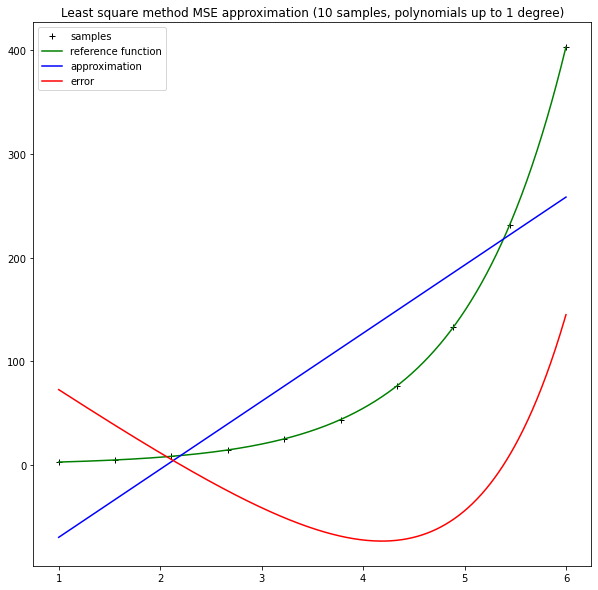

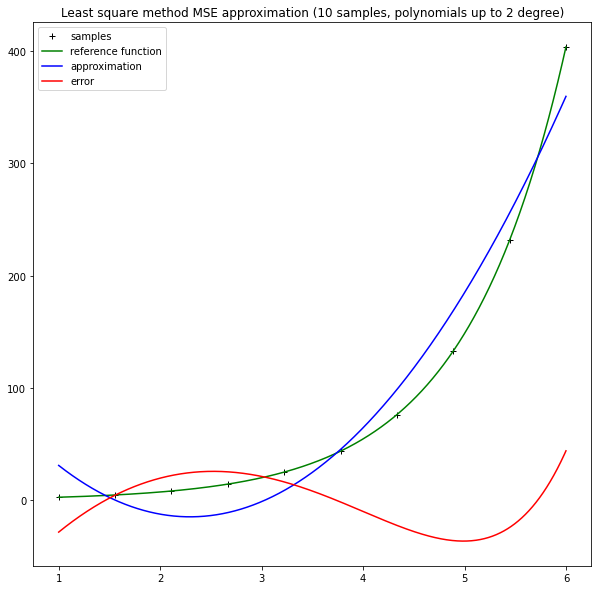

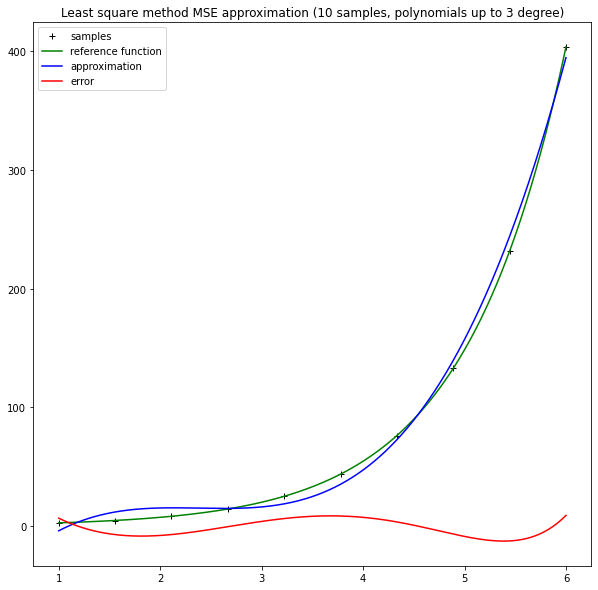

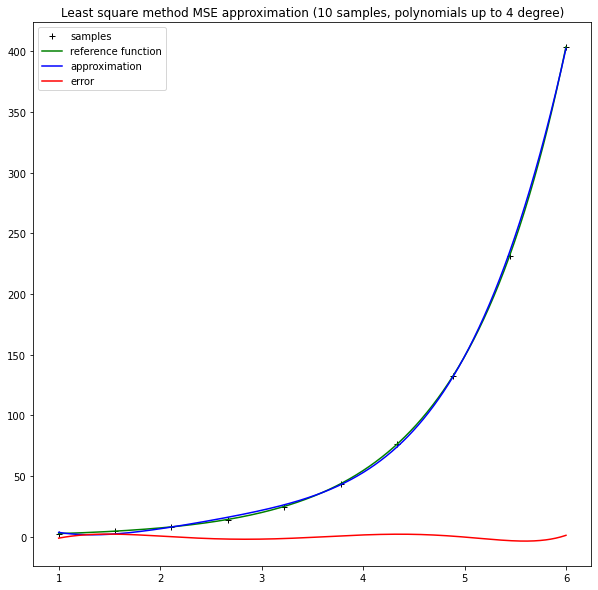

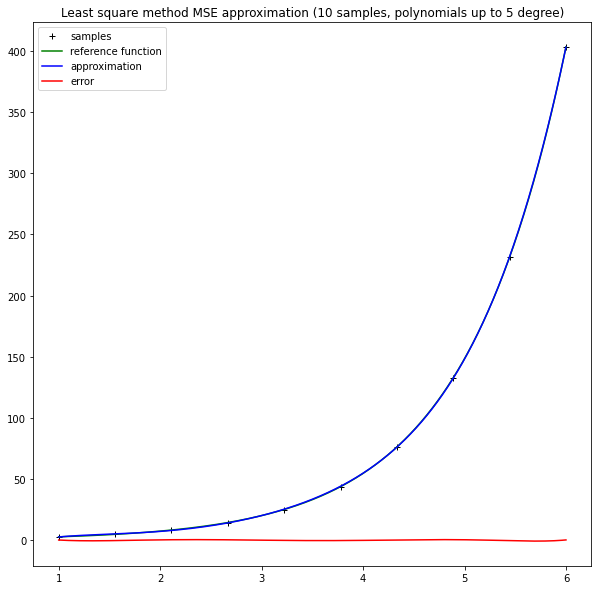

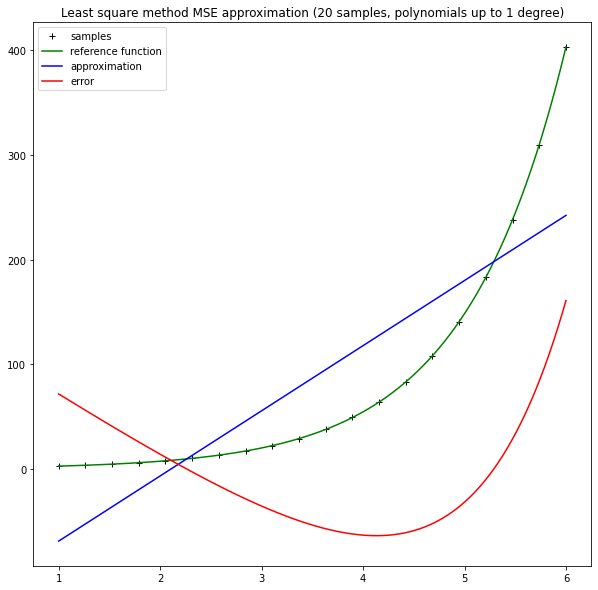

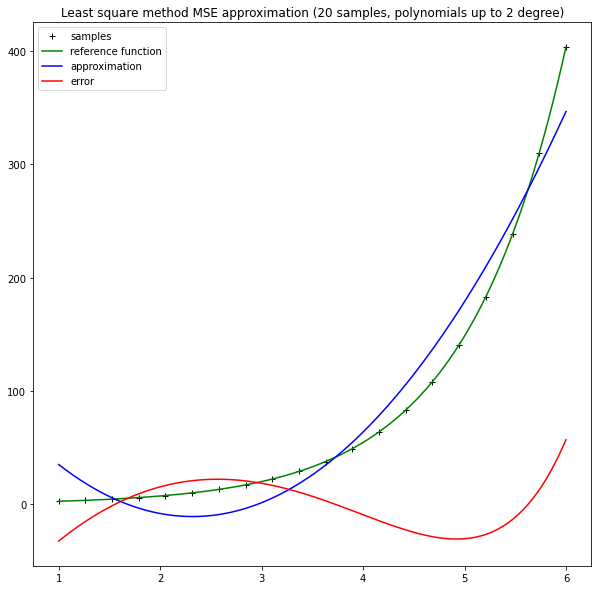

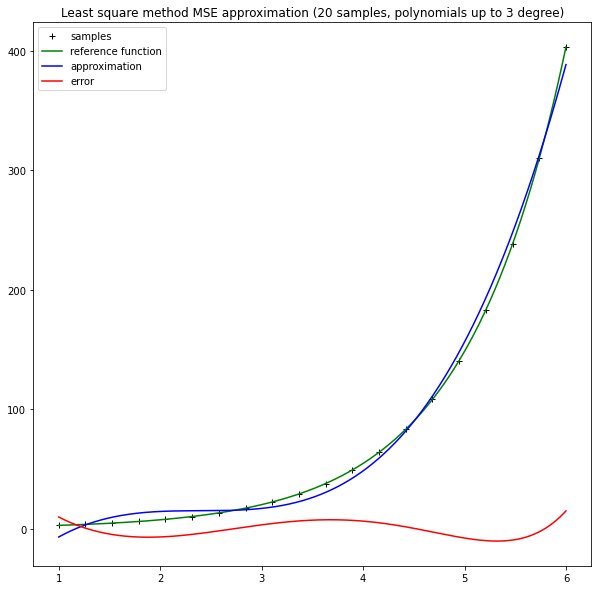

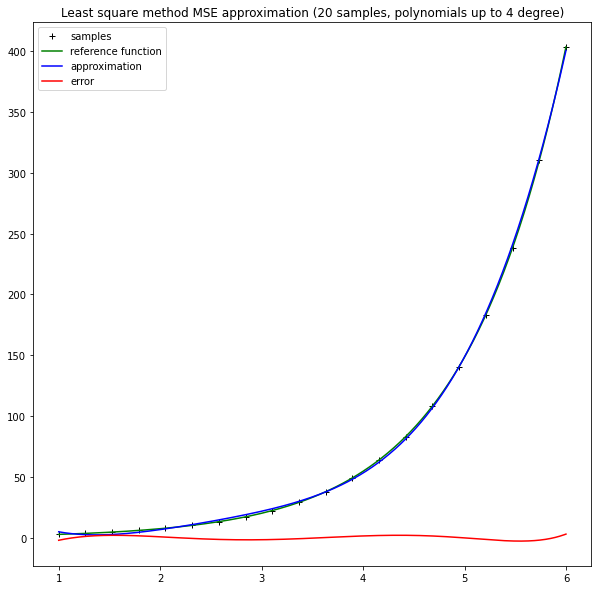

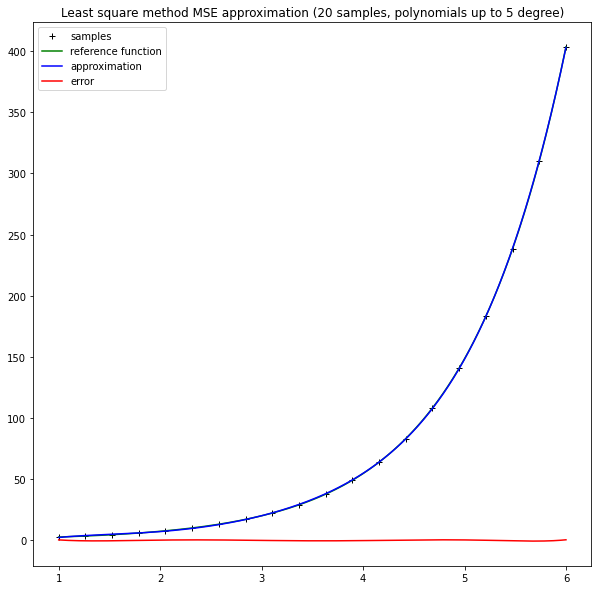

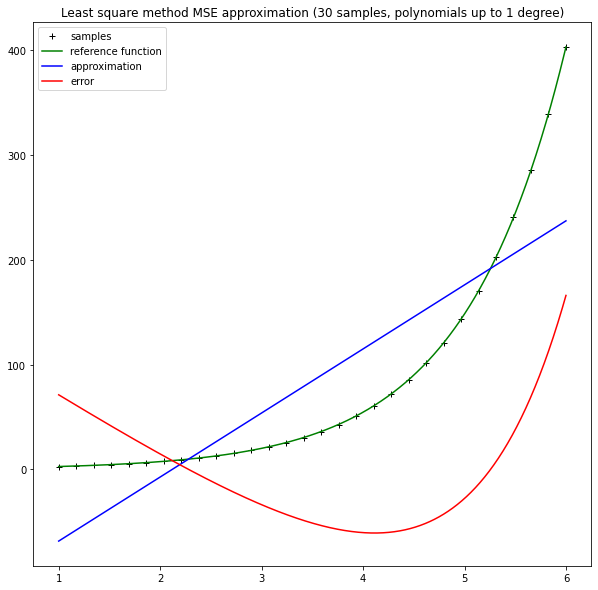

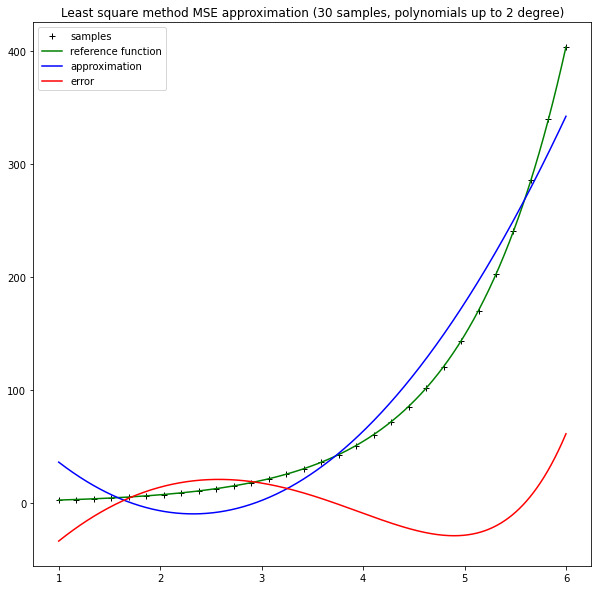

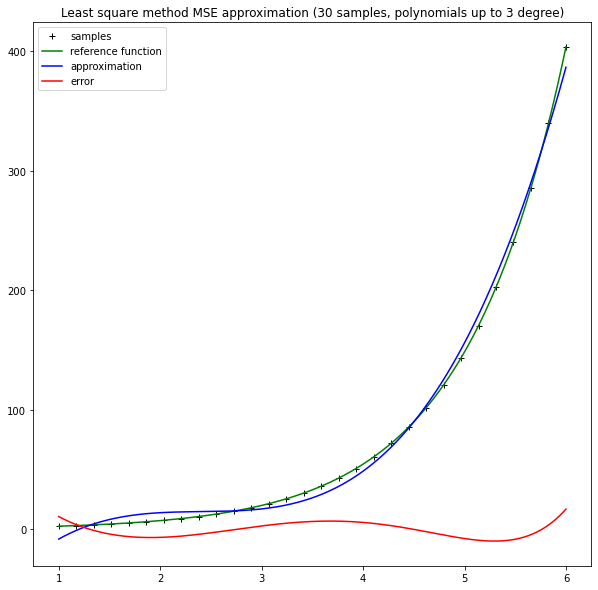

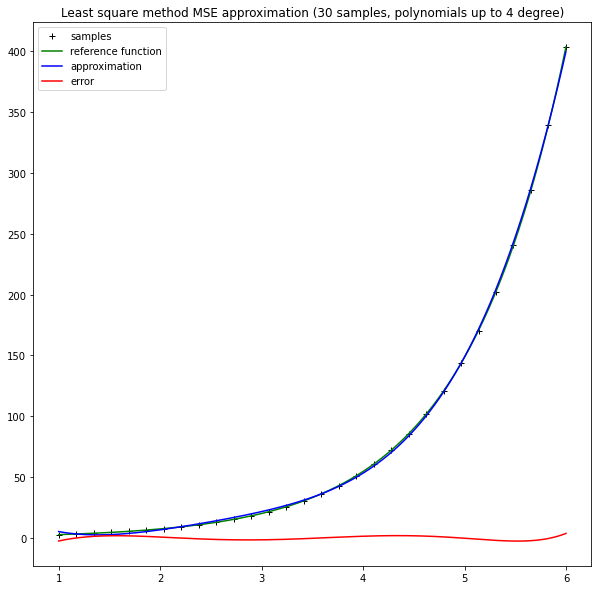

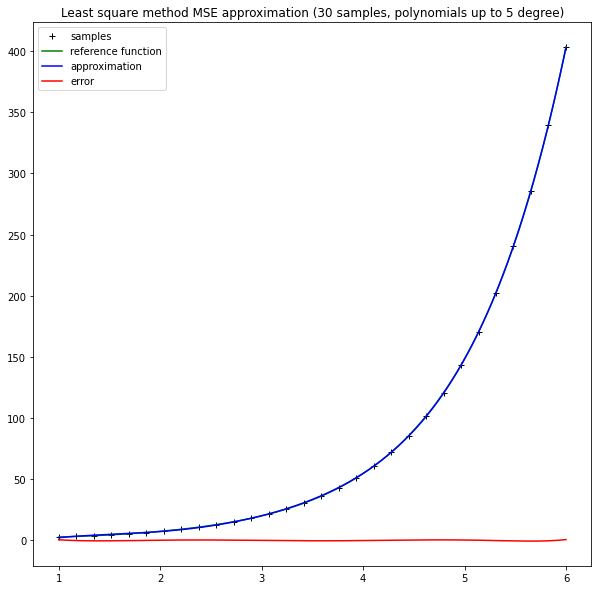

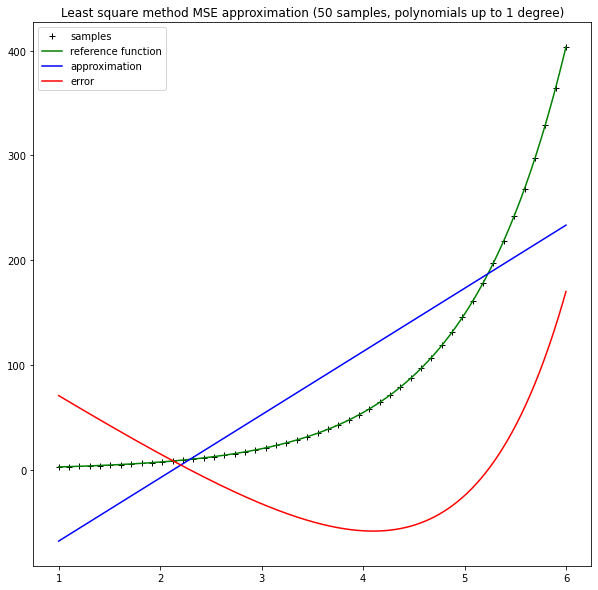

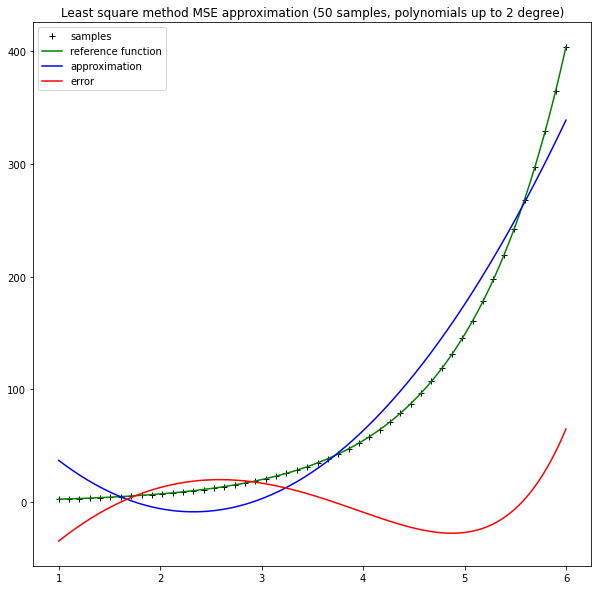

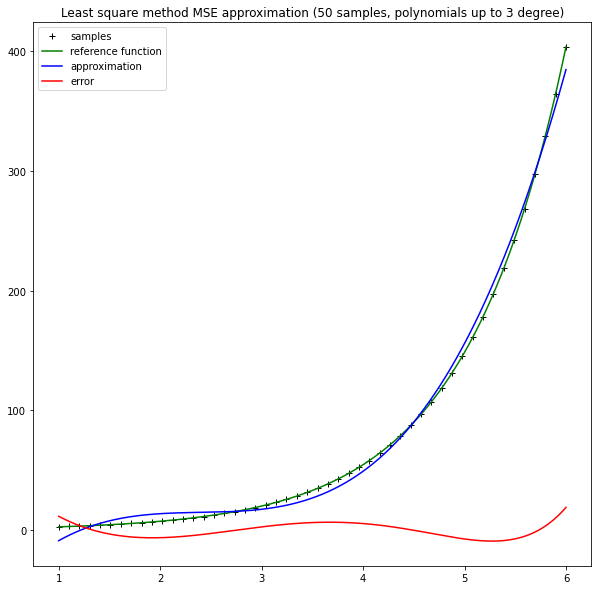

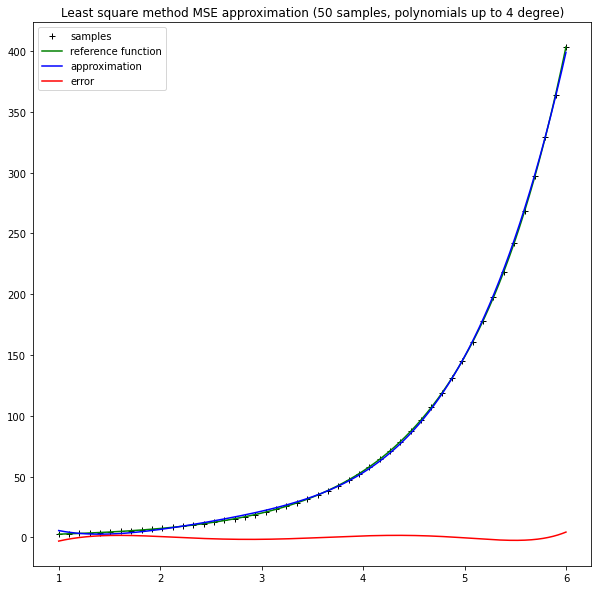

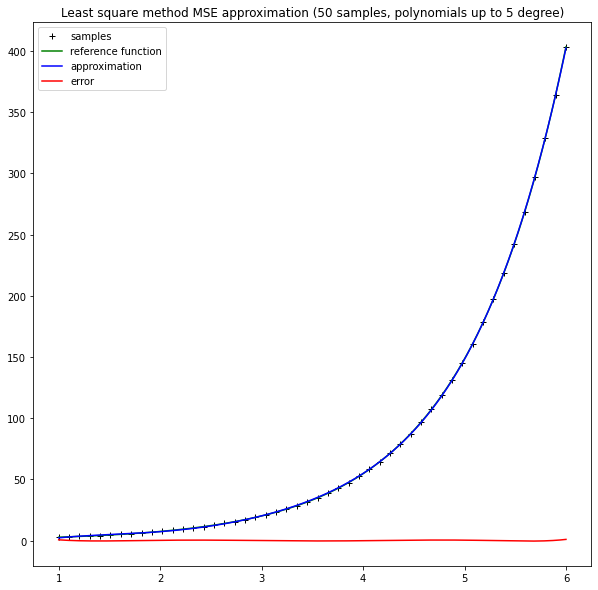

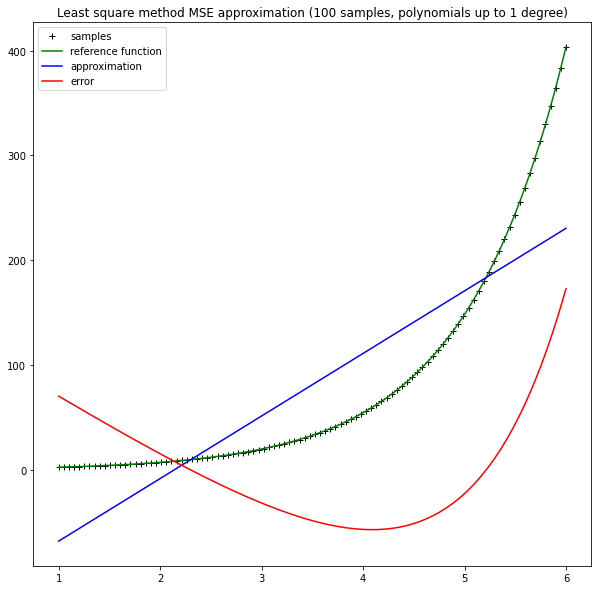

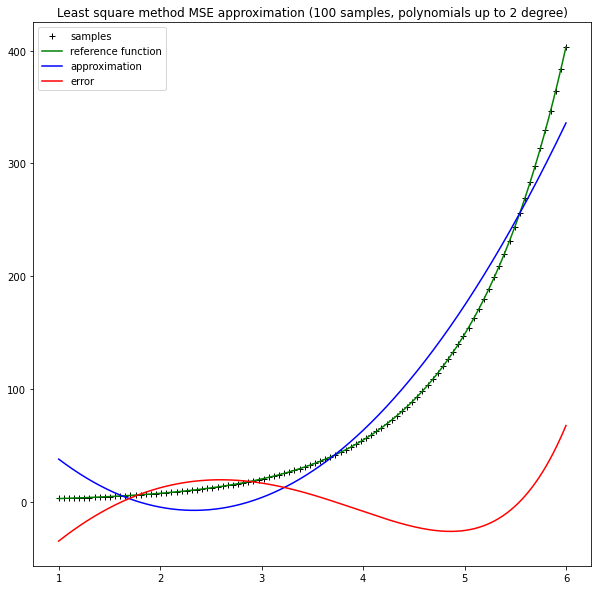

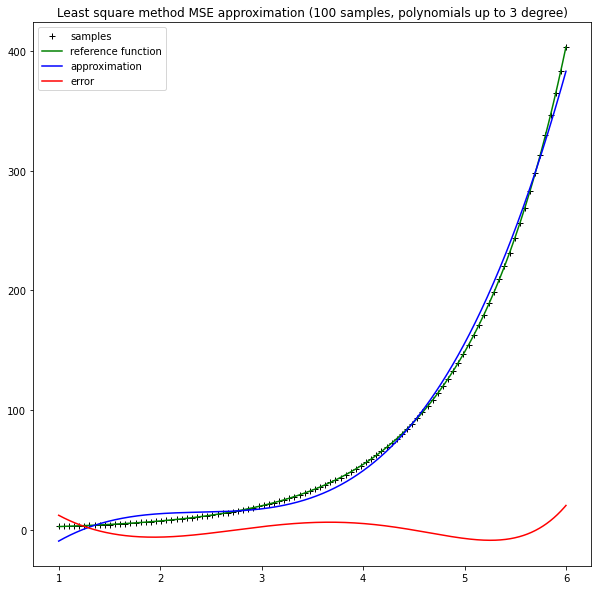

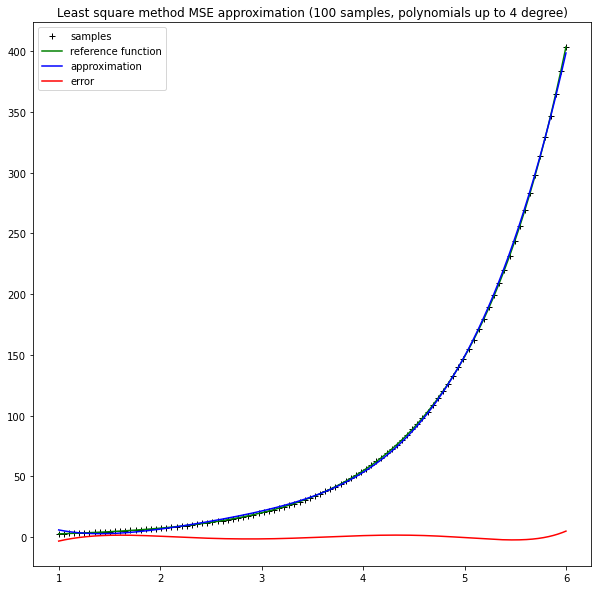

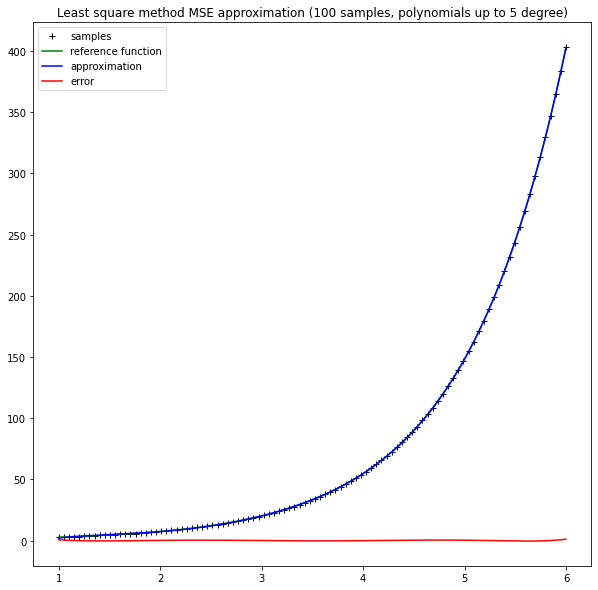

In [5]:
table = collect_statistics(lsm_coefs, 'Least square method MSE approximation')
display_table(table, 'Least square method MSE stats')

<ipython-input-4-9321e5d4d744>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 10))


Sample count\max polynomial degree,1,2,3,4,5
10,53.8534,21.7435,6.86393,1.71753,0.35051
20,51.7379,19.818,5.98904,1.48609,0.311036
30,51.381,19.4512,5.78869,1.41369,0.295477
50,51.2088,19.2661,5.67342,1.37002,0.280316
100,51.1414,19.1902,5.6249,1.34765,0.272698


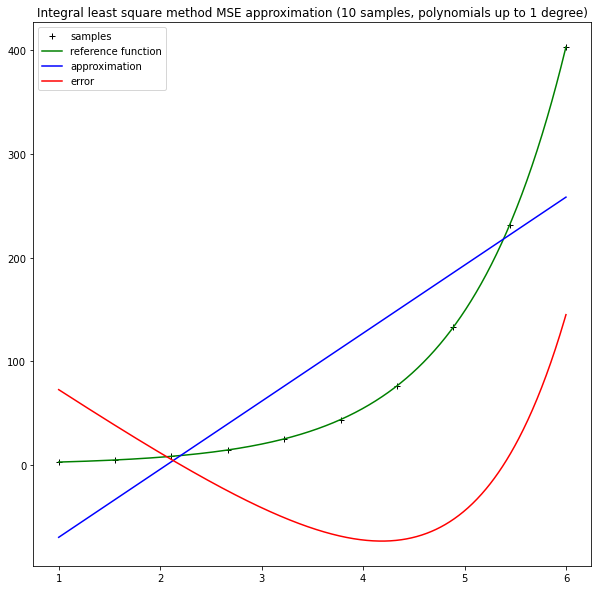

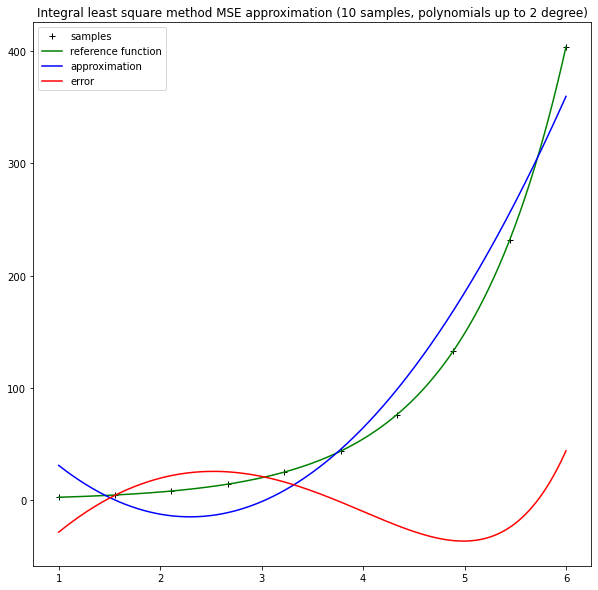

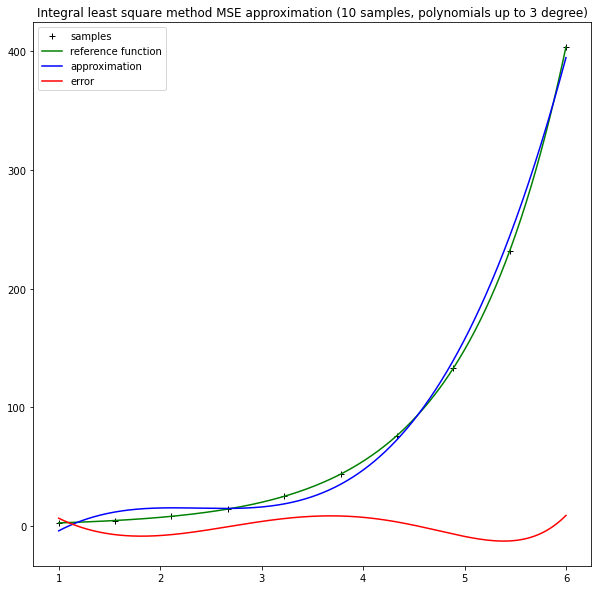

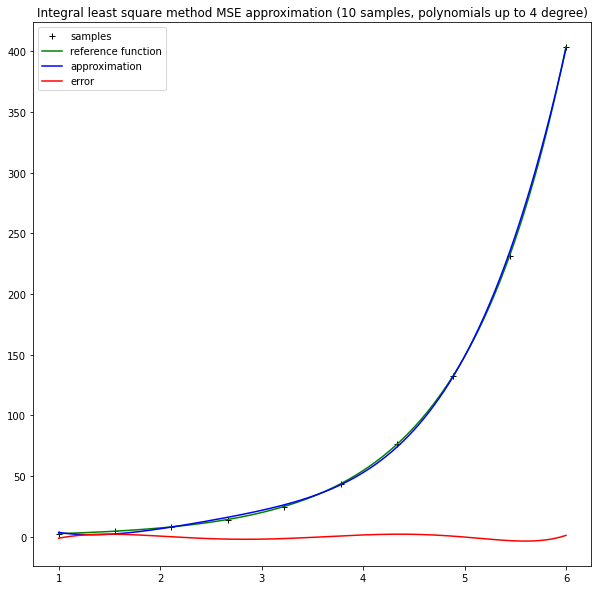

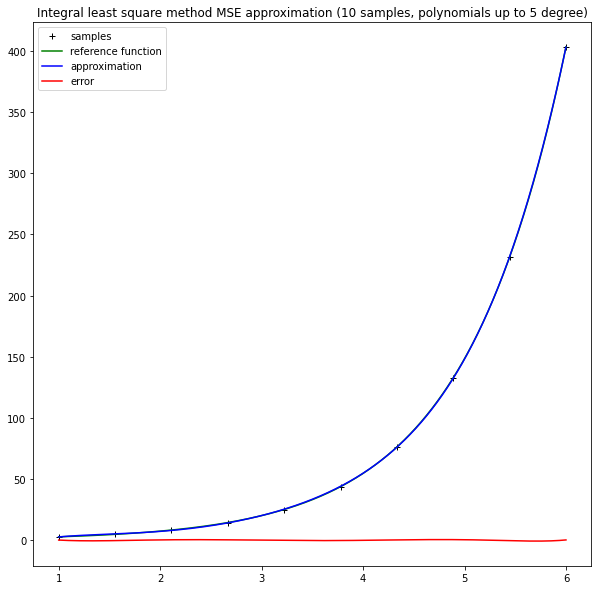

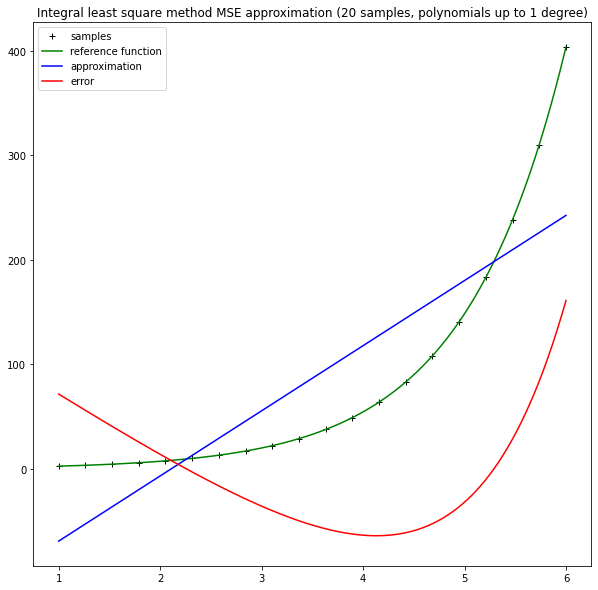

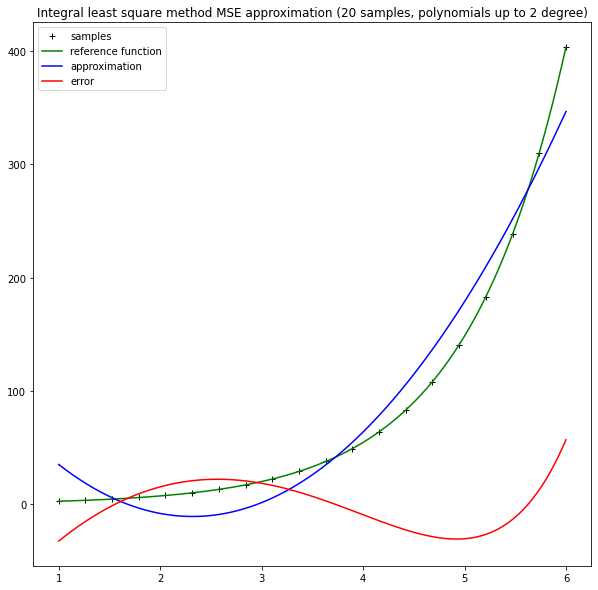

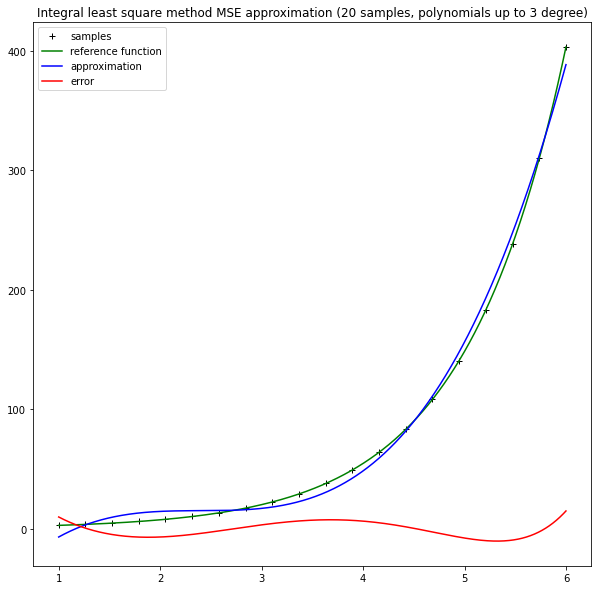

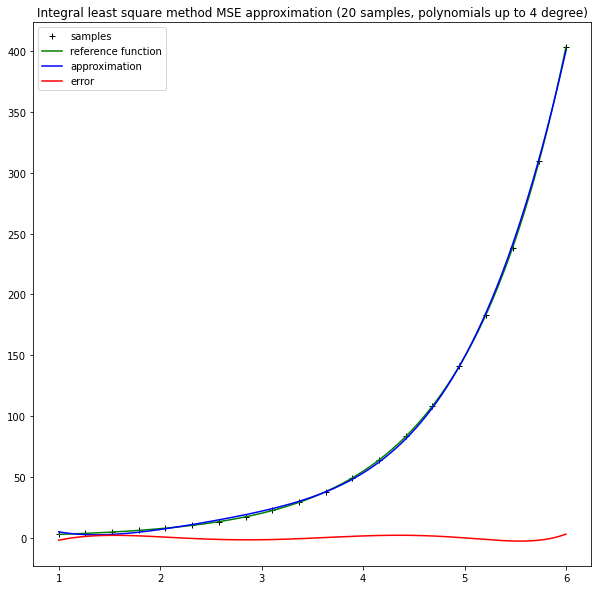

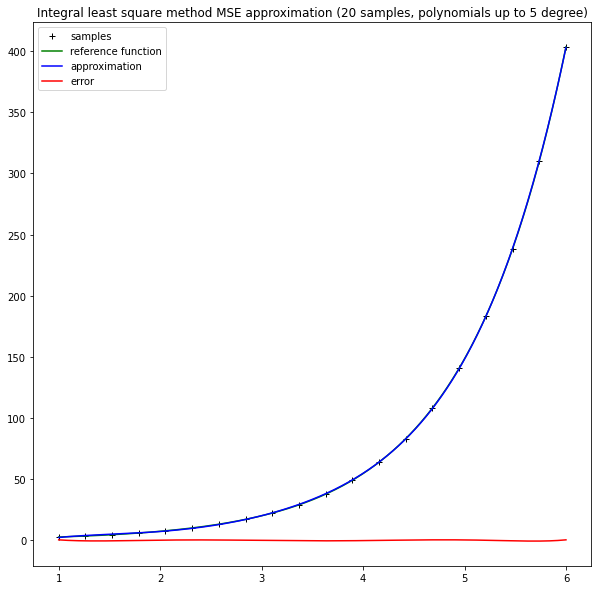

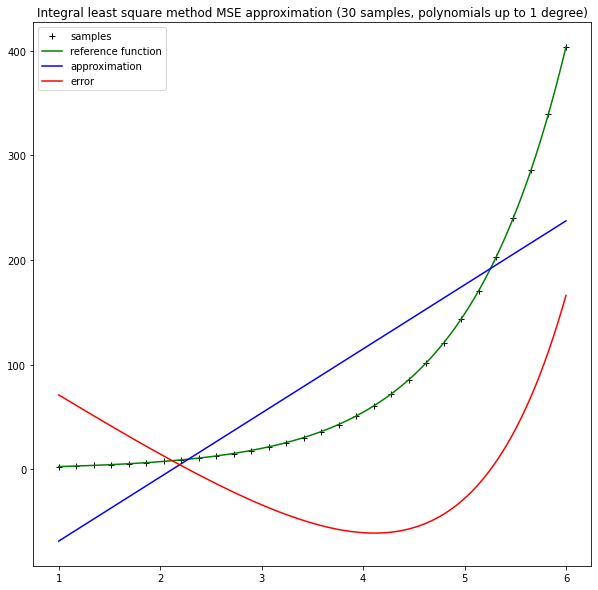

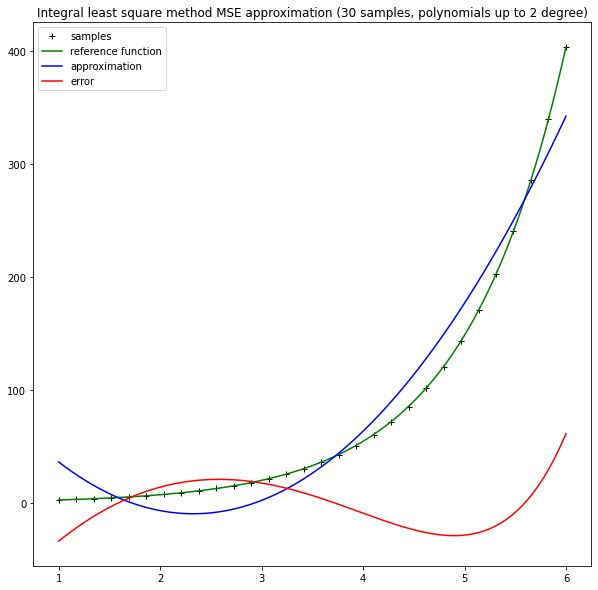

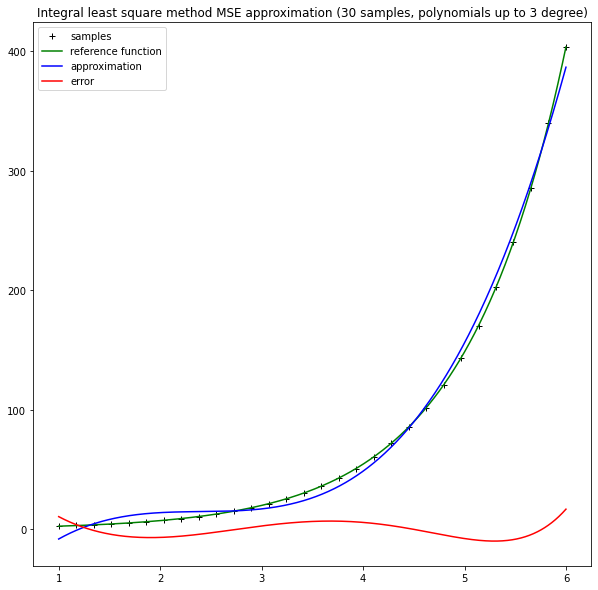

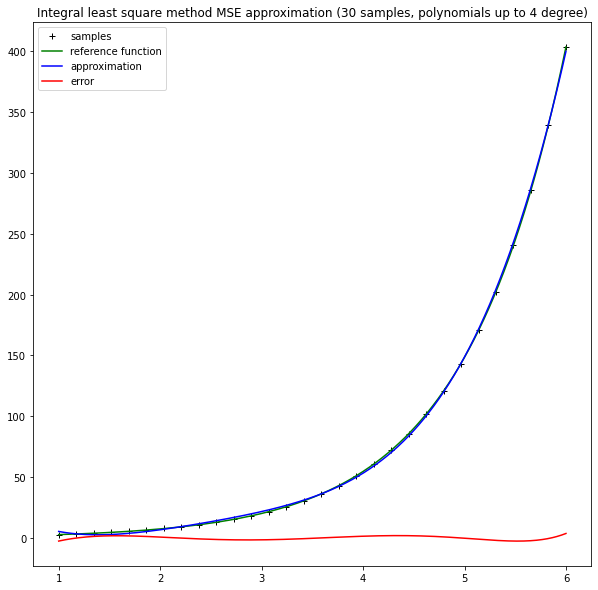

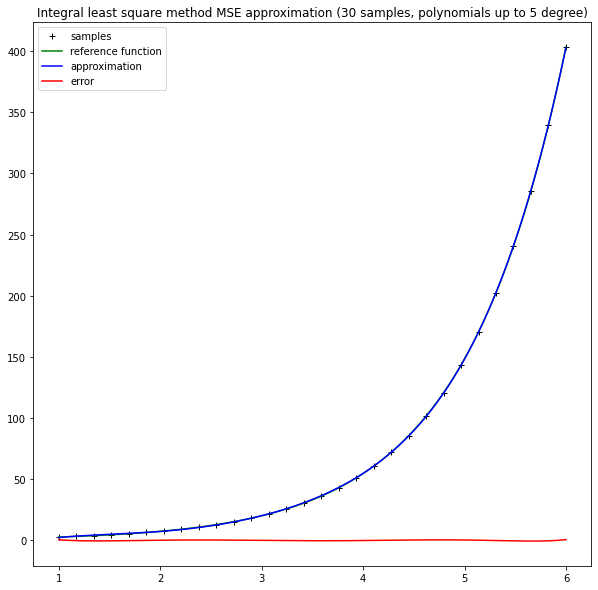

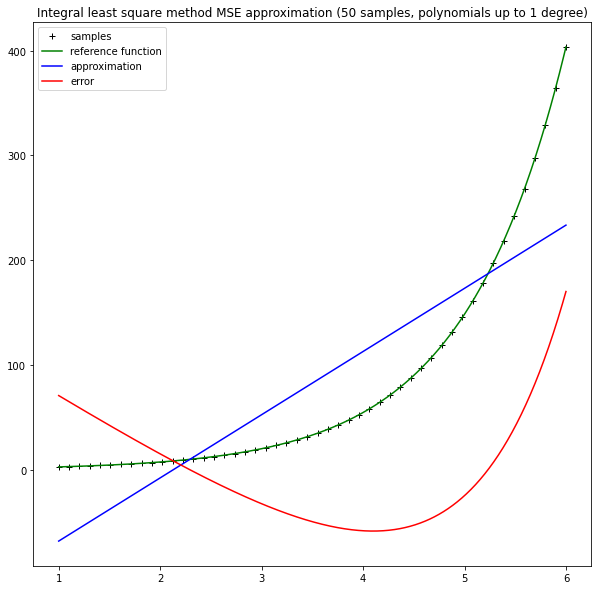

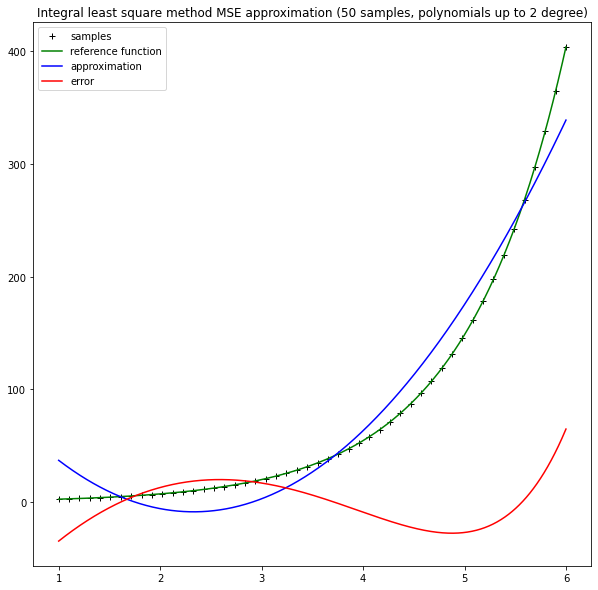

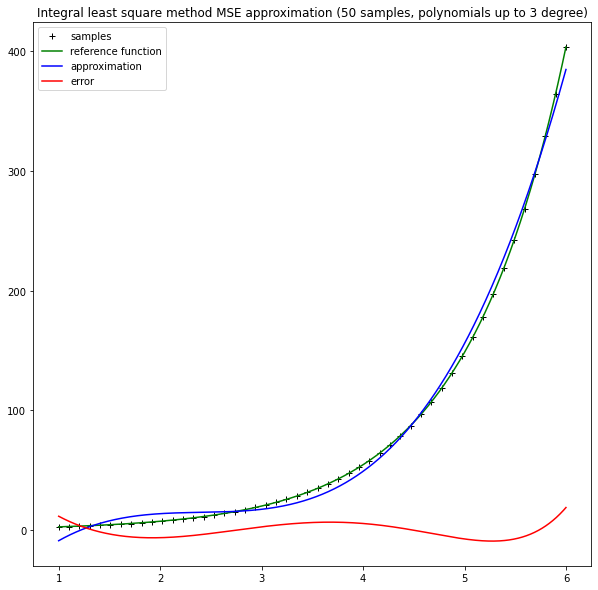

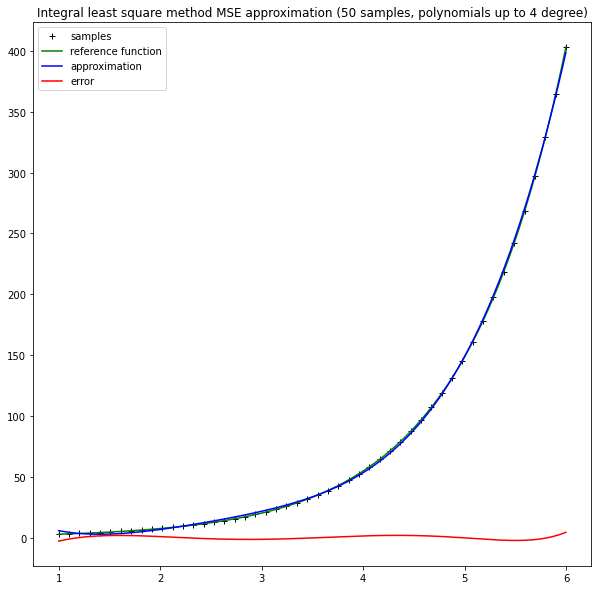

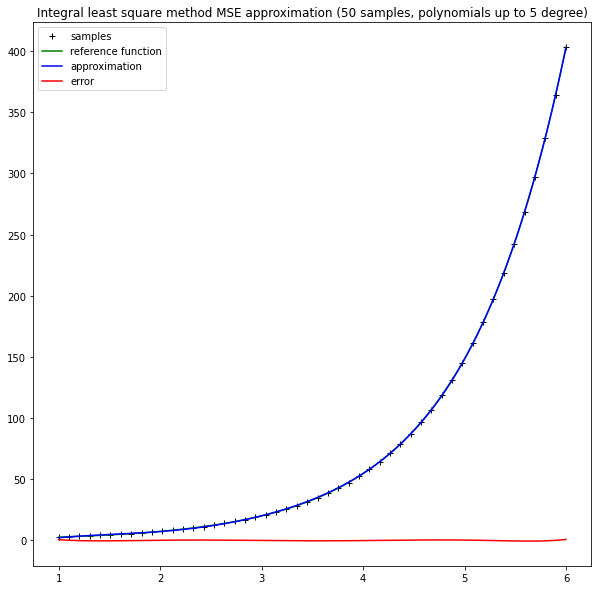

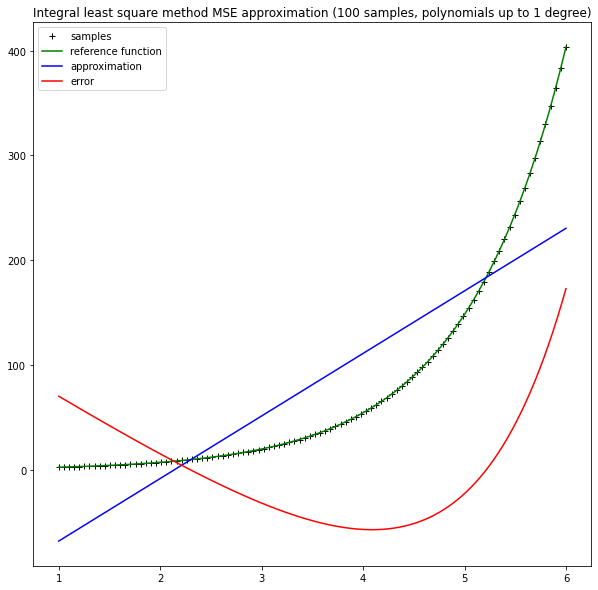

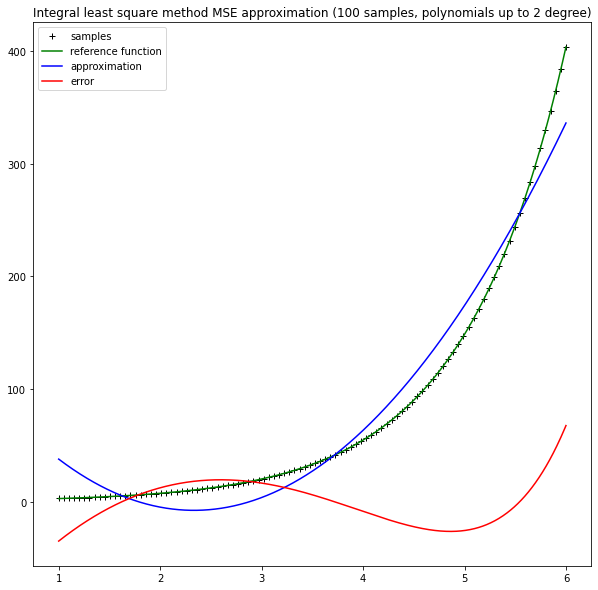

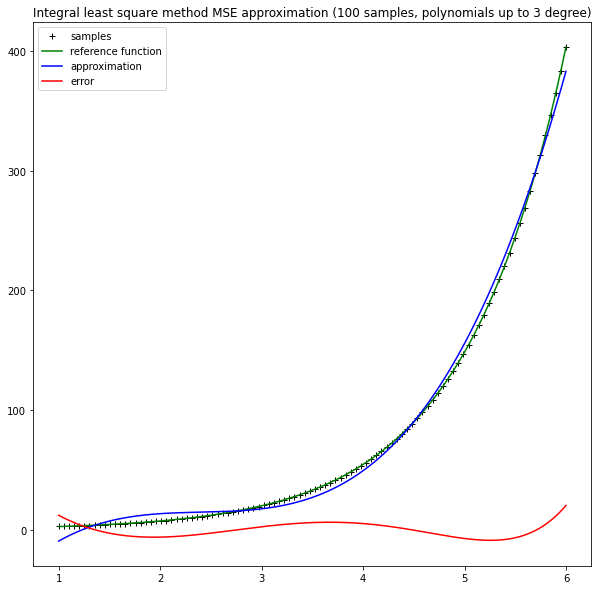

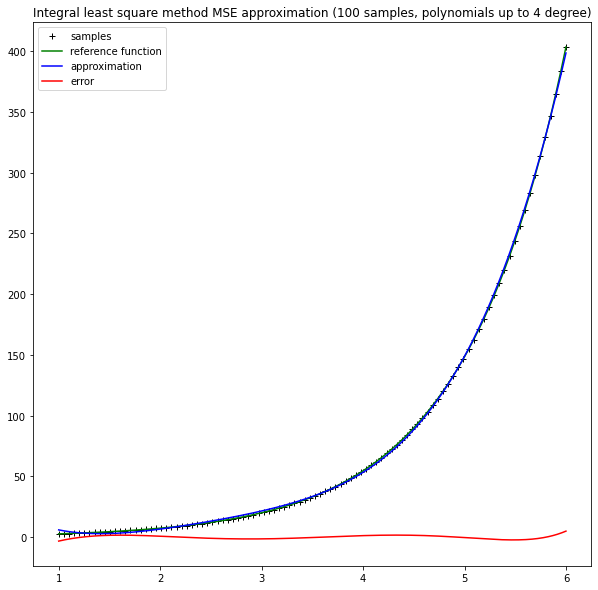

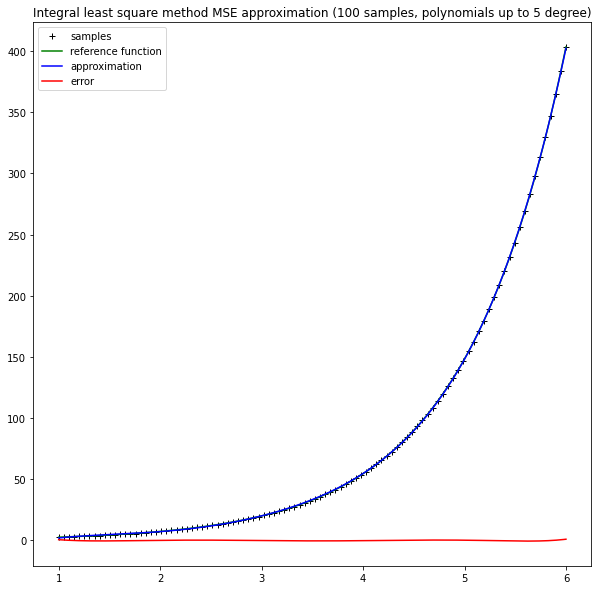

In [6]:
table = collect_statistics(lsm_coefs, 'Integral least square method MSE approximation')
display_table(table, 'Integral least square method MSE stats')